In [1]:
from shared_notebook_utils import *
datasets = load_datasets(dirnames=['freesound_loops_db_4000'], clean=True)
dataset = datasets[0]
methods_to_compare = ['Percival14_essentia', 'Percival14Mod']
%matplotlib inline

# This notebook contains expriments that complement those found in the article: Font, F., & Serra, X. (2016). Tempo Estimation for Music Loops and a Simple Confidence Measure. In Proceedings of the Int. Conf. on Music Information Retrieval (ISMIR).
# License: CC-BY-4.0

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


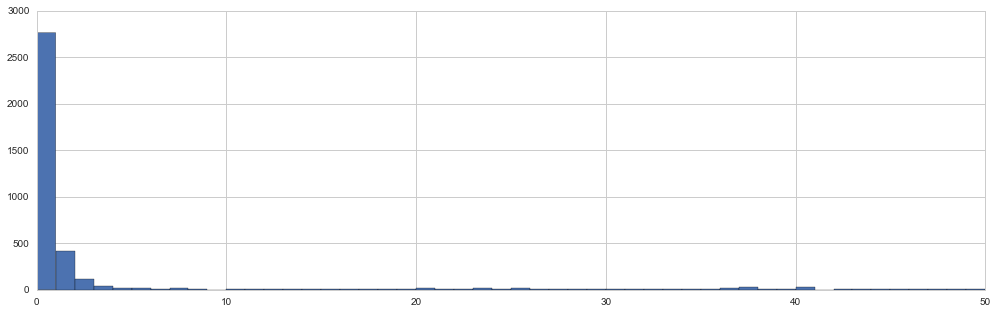

(ROUNDED) 1179 produce different results, 2764 produce same results (29.90% different)
(FLOAT, 0.1 max dif) 1458 produce different results, 2485 produce same results (36.98% different)


In [68]:
# Evaluate how differnt the ouputs of the two algorithms are
bpm_round_diffs = list()
bpm_diffs = list()
for sound in dataset.data.values():
    try:
        percival14mod_bpm = sound['analysis']['Percival14Mod']['bpm']
        percival14essentia_bpm = sound['analysis']['Percival14_essentia']['bpm']
        bpm_round_diffs.append(round(percival14mod_bpm) - round(percival14essentia_bpm))
        bpm_diffs.append(percival14mod_bpm - percival14essentia_bpm)
    except KeyError:
        # Loop could not be analysed with both algorithms, continue
        continue

fig1, axs = plt.subplots(1, 1, figsize=(17, 5))
plt.hist([abs(i) for i in bpm_round_diffs], bins=50, range=(0,50))
plt.show()

# Considering rounded bpms
n_different = len(np.where(np.array([abs(i) for i in bpm_round_diffs])>0)[0])
n_same = len(np.where(np.array([abs(i) for i in bpm_round_diffs])==0)[0])
print '(ROUNDED) %i produce different results, %i produce same results (%.2f%% different)' % (n_different, n_same, 100.0*(n_different)/(n_different+n_same))

# Considering float bpms
n_different = len(np.where(np.array([abs(i) for i in bpm_diffs])>0.1)[0])
n_same = len(np.where(np.array([abs(i) for i in bpm_diffs])<=0.1)[0])
print '(FLOAT, 0.1 max dif) %i produce different results, %i produce same results (%.2f%% different)' % (n_different, n_same, 100.0*(n_different)/(n_different+n_same))
